# Introduction 
----

Our DataScience Engineering Group was contacted by the costumer to predict which songs, out of a data set of 200 songs, Andreas Lindholm (bellow) will like.

<img src='https://webb.uu.se/image/full_image?img_id=55390934&t=1470166989270' width="100" height="200"/>

To do so, we received a dataset of 750 songs and we decided to first analyze this data to further apply a machine learning machinery. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import and analysis of data 
----

In [2]:
data = pd.read_csv('training_data.csv')
features=data.drop('label',axis=1)
target=data['label']
s = ['like' if i==1 else 'dislike' for i in target]
data['label']=s

In [3]:
data.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1120   -14.835     0       0.0444  119.879               4    0.143   
1    0.2630    -6.935     1       0.0319  123.969               4    0.582   
2    0.1270    -9.290     1       0.0292  139.931               4    0.199   
3    0.1840   -11.005     1       0.0429  109.960               4    0.798   
4    0.0692    -8.137     0       0.0351   90.807               4    0.288   

  label  
0  like  
1  like  
2  like  
3  like  
4  like

In [4]:
sns.set(font_scale=1,style='white')
sns.set_context("notebook")

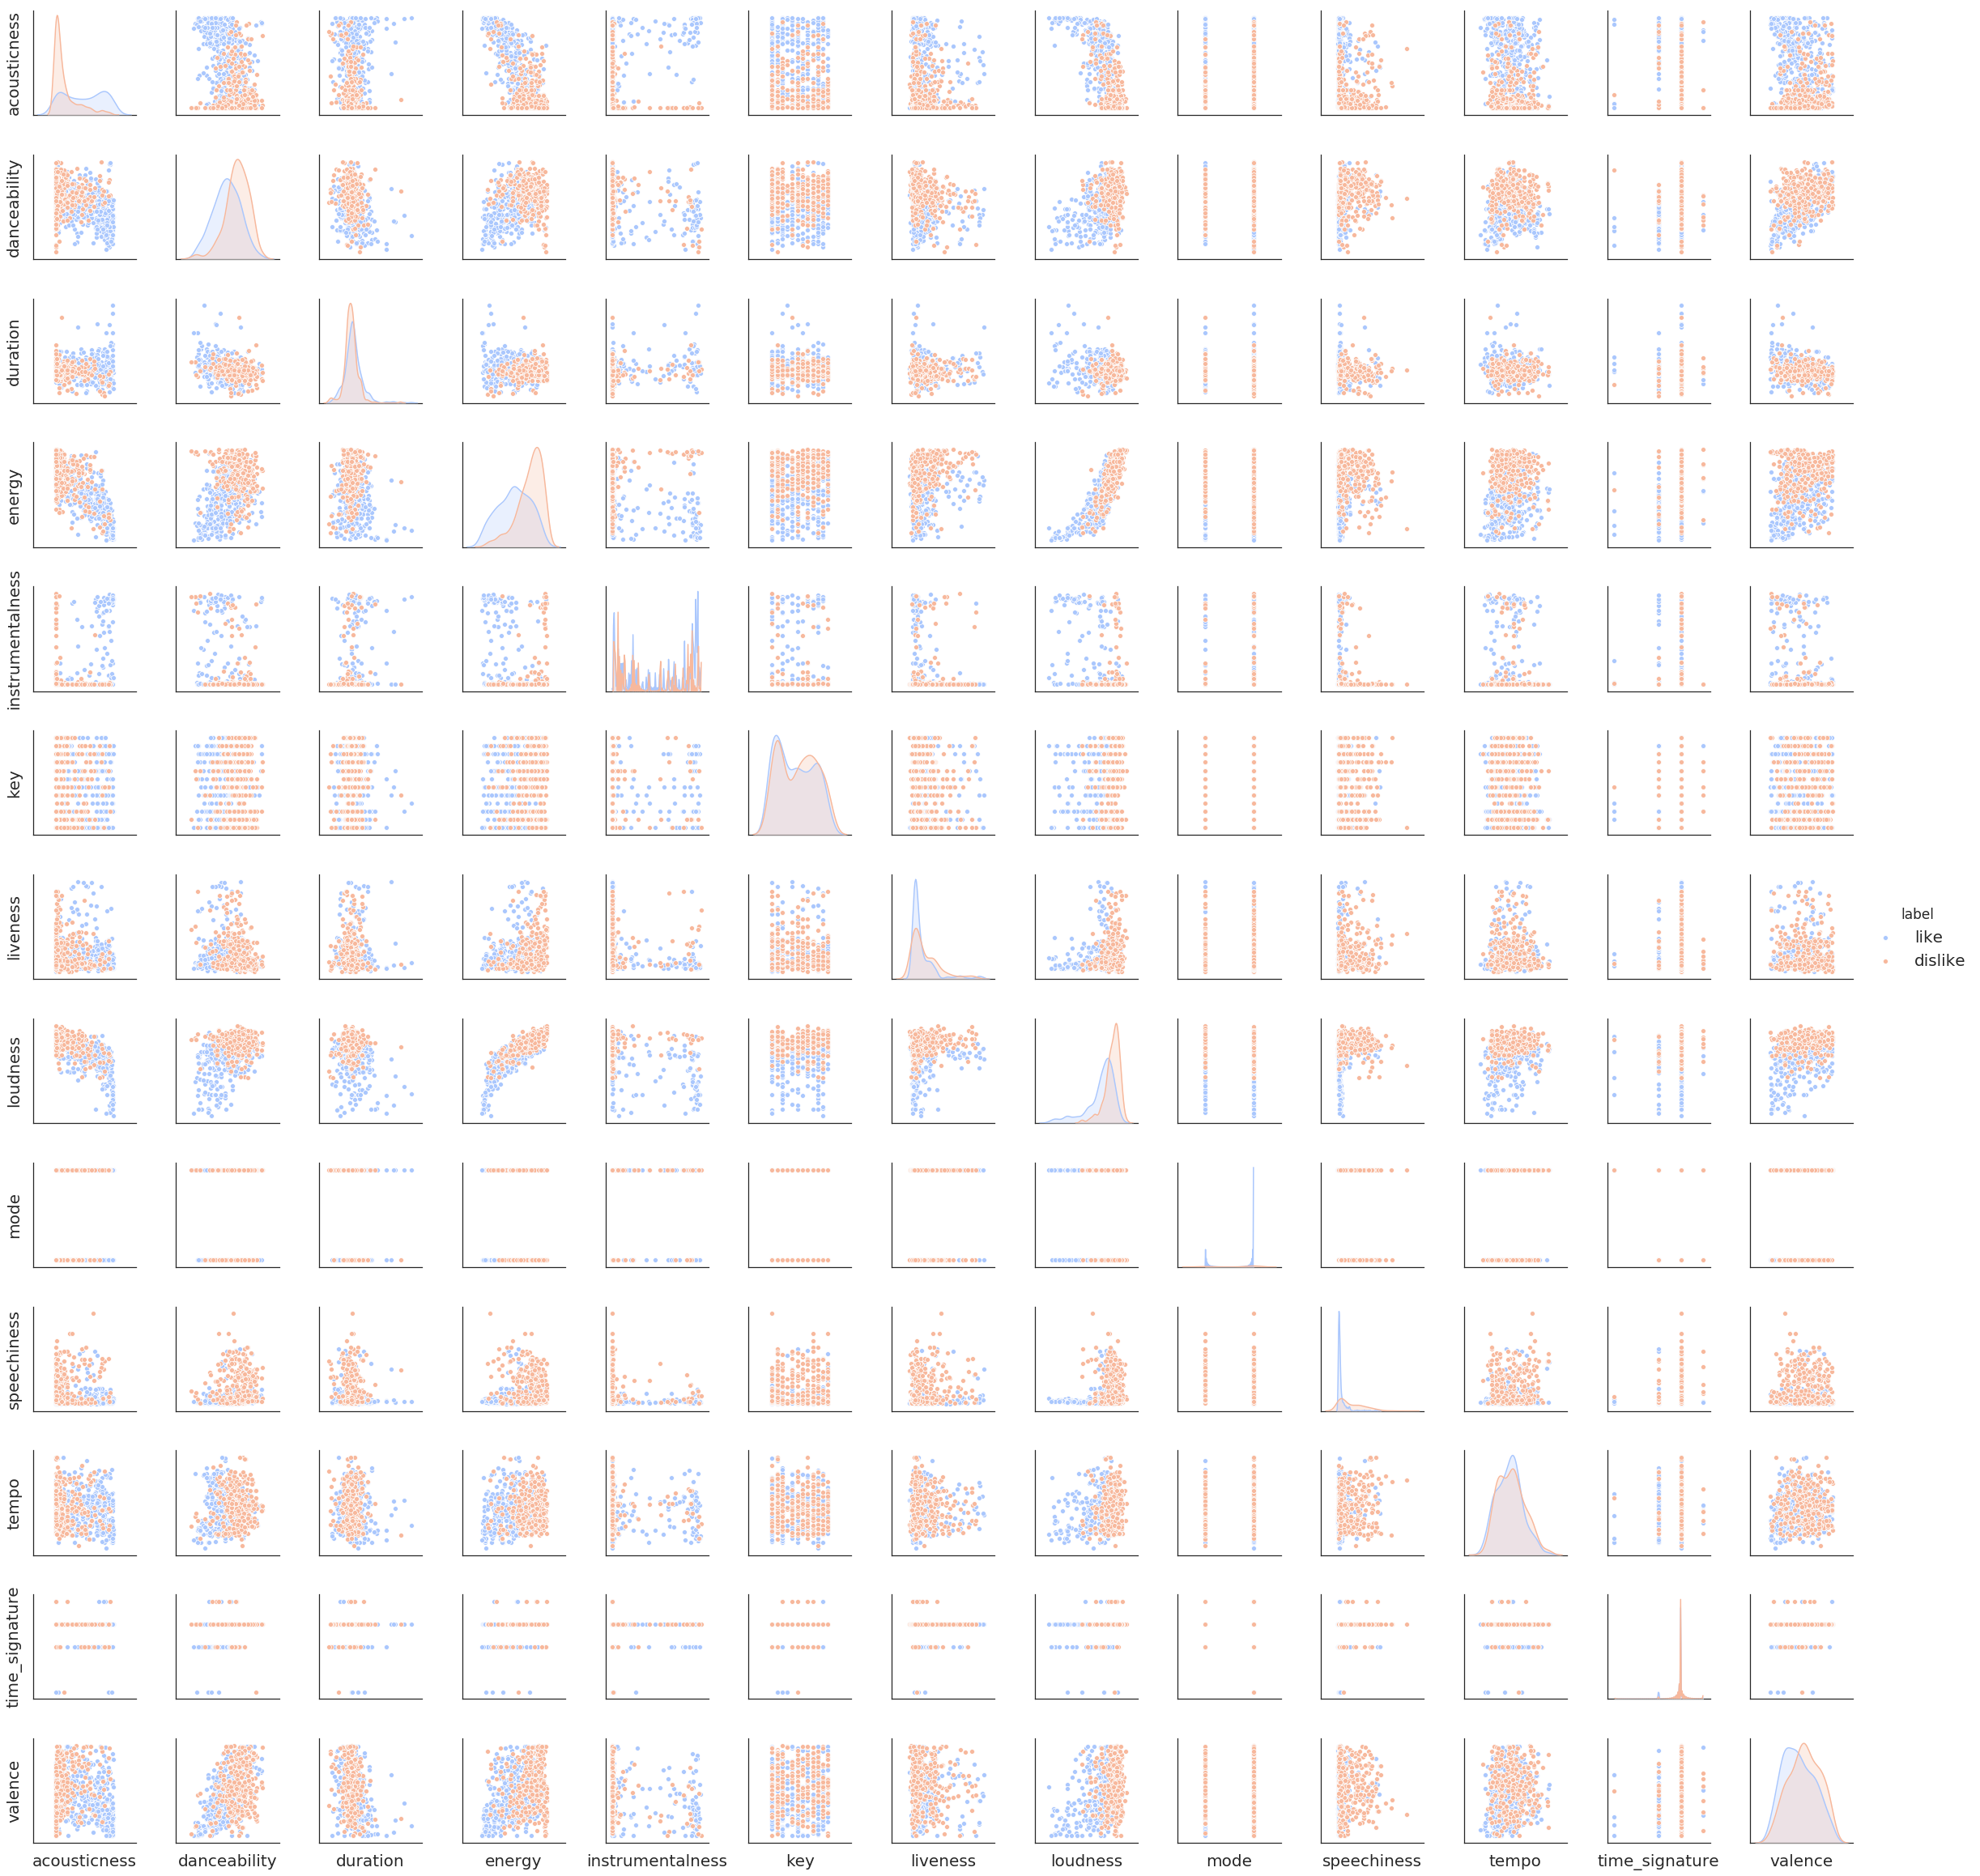

In [48]:
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
sns_plot = sns.pairplot(data,hue='label',palette='coolwarm')
sns_plot.set(xticklabels=[],yticklabels=[])
sns_plot.savefig('all_data.eps', dpi=300)

## Normalizing data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
s_feat = scaler.transform(features)

/home/rodrigo/anaconda3/envs/work/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rodrigo/anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [6]:
feat_data=pd.DataFrame(s_feat,columns=features.columns)

In [7]:
feat_data.head()

acousticness  danceability  duration    energy  instrumentalness       key  \
0      1.051530     -0.479513 -1.830645 -0.289129          2.755574  0.872602   
1     -0.489072      0.683807 -0.199770  0.078268         -0.385931 -0.228242   
2     -0.072134      0.195213 -0.059696 -0.549862         -0.385917  0.046969   
3      0.720345      1.242201 -1.277002 -1.474280          0.422545  0.046969   
4      1.554221     -0.764526 -0.590027 -0.534060         -0.385265  0.322180   

   liveness  loudness      mode  speechiness     tempo  time_signature  \
0 -0.514824 -1.256057 -1.692920    -0.521443 -0.018575         0.24344   
1  0.335928  0.312609  0.590695    -0.640895  0.125647         0.24344   
2 -0.430312 -0.155012  0.590695    -0.666697  0.688498         0.24344   
3 -0.109167 -0.495552  0.590695    -0.535778 -0.368338         0.24344   
4 -0.755964  0.073934 -1.692920    -0.610315 -1.043710         0.24344   

    valence  
0 -1.479699  
1  0.353630  
2 -1.245835  
3  1.255678  
4 -0.874157

In [8]:
from sklearn.model_selection import train_test_split

X = feat_data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=123)

# Classification
----
Now that we have imported and normalized the data we can proceed with the classification problem. To fulfill this task, we chose to apply two different approaches:
* _K Nearest Neighboor_ classification 
* _Deep Neural Network_ classification.



## K-NN
-----



In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
error=[]
for j in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)

    predict_knn = knn.predict(X_test)
    cm_knn = confusion_matrix(y_test,predict_knn)
    report_knn = classification_report(y_test,predict_knn)
    error.append(knn.score(X_test,y_test))

error=np.array(error)
best=error.argmax()+1    

knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train,y_train)

predict_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test,predict_knn)
report_knn = classification_report(y_test,predict_knn)

print('Best k',best)
print('\nConfusion Matrix')
print(cm_knn)
print('\n')
print(report_knn)

Best k 10

Confusion Matrix
[[29 11]
 [ 3 32]]


              precision    recall  f1-score   support

           0       0.91      0.72      0.81        40
           1       0.74      0.91      0.82        35

   micro avg       0.81      0.81      0.81        75
   macro avg       0.83      0.82      0.81        75
weighted avg       0.83      0.81      0.81        75



In [11]:
predict_knn = knn.predict(X)
cm_knn = confusion_matrix(y,predict_knn)
report_knn = classification_report(y,predict_knn)

print('Best k',best)
print('\nConfusion Matrix')
print(cm_knn)
print('\n')
print(report_knn)

Best k 10

Confusion Matrix
[[224  74]
 [ 49 403]]


              precision    recall  f1-score   support

           0       0.82      0.75      0.78       298
           1       0.84      0.89      0.87       452

   micro avg       0.84      0.84      0.84       750
   macro avg       0.83      0.82      0.83       750
weighted avg       0.84      0.84      0.83       750



## Deep Neural Network
----


In [10]:
from keras.layers import Input, Activation, BatchNormalization,Dense
from keras.activations import relu,softmax,selu,linear
from keras.models import Model
from keras.utils import to_categorical

Using TensorFlow backend.


### Transforming to 'One Hot Encode' format
[0,1] means like

[1,0] means dislike

In [11]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)
y_cat=to_categorical(y)

In [12]:
#creating a block function
def block(n_output):
    def f(x):
        
        #start
        h=x
        h = BatchNormalization()(h)
        h = Dense(n_output)(h)
        h = Activation(selu)(h)
        
        return h
    
    return f

In [13]:
x = Input((13,))

#1
z=block(100)(x)
#2
z=block(100)(z)
#3
z=block(10)(z)

#Final
z = Dense(units=2)(z)
z = Activation(softmax)(z)

model = Model(inputs=x, outputs=z)
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

hist=model.fit(X_train, y_train_cat, epochs=500, batch_size=675,validation_data=[X_test,y_test_cat],shuffle=False)

Train on 675 samples, validate on 75 samples
Epoch 1/500
675/675 [==============================] - 4s 6ms/step - loss: 0.9476 - acc: 0.4993 - val_loss: 0.8683 - val_acc: 0.5733
Epoch 2/500
675/675 [==============================] - 0s 151us/step - loss: 0.8055 - acc: 0.5689 - val_loss: 0.7540 - val_acc: 0.6533
Epoch 3/500
675/675 [==============================] - 0s 124us/step - loss: 0.7141 - acc: 0.6104 - val_loss: 0.6816 - val_acc: 0.6933
Epoch 4/500
675/675 [==============================] - 0s 146us/step - loss: 0.6527 - acc: 0.6430 - val_loss: 0.6323 - val_acc: 0.7067
Epoch 5/500
675/675 [==============================] - 0s 146us/step - loss: 0.6097 - acc: 0.6622 - val_loss: 0.5971 - val_acc: 0.6800
Epoch 6/500
675/675 [==============================] - 0s 147us/step - loss: 0.5781 - acc: 0.6741 - val_loss: 0.5715 - val_acc: 0.6800
Epoch 7/500
675/675 [==============================] - 0s 137us/step - loss: 0.5537 - acc: 0.6889 - val_loss: 0.5520 - val_acc: 0.7200
Epoch 8/500


675/675 [==============================] - 0s 165us/step - loss: 0.3935 - acc: 0.8148 - val_loss: 0.4626 - val_acc: 0.7867
Epoch 62/500
675/675 [==============================] - 0s 170us/step - loss: 0.3929 - acc: 0.8163 - val_loss: 0.4625 - val_acc: 0.7867
Epoch 63/500
675/675 [==============================] - 0s 145us/step - loss: 0.3923 - acc: 0.8178 - val_loss: 0.4624 - val_acc: 0.7867
Epoch 64/500
675/675 [==============================] - 0s 155us/step - loss: 0.3918 - acc: 0.8178 - val_loss: 0.4622 - val_acc: 0.7867
Epoch 65/500
675/675 [==============================] - 0s 134us/step - loss: 0.3912 - acc: 0.8178 - val_loss: 0.4621 - val_acc: 0.7867
Epoch 66/500
675/675 [==============================] - 0s 175us/step - loss: 0.3907 - acc: 0.8178 - val_loss: 0.4620 - val_acc: 0.7867
Epoch 67/500
675/675 [==============================] - 0s 149us/step - loss: 0.3901 - acc: 0.8178 - val_loss: 0.4620 - val_acc: 0.7867
Epoch 68/500
675/675 [==============================] - 0s 10

Epoch 122/500
675/675 [==============================] - 0s 81us/step - loss: 0.3677 - acc: 0.8252 - val_loss: 0.4590 - val_acc: 0.7867
Epoch 123/500
675/675 [==============================] - 0s 91us/step - loss: 0.3674 - acc: 0.8252 - val_loss: 0.4591 - val_acc: 0.7867
Epoch 124/500
675/675 [==============================] - 0s 144us/step - loss: 0.3671 - acc: 0.8252 - val_loss: 0.4591 - val_acc: 0.7867
Epoch 125/500
675/675 [==============================] - 0s 103us/step - loss: 0.3668 - acc: 0.8252 - val_loss: 0.4591 - val_acc: 0.7867
Epoch 126/500
675/675 [==============================] - 0s 86us/step - loss: 0.3665 - acc: 0.8252 - val_loss: 0.4591 - val_acc: 0.7867
Epoch 127/500
675/675 [==============================] - 0s 90us/step - loss: 0.3662 - acc: 0.8252 - val_loss: 0.4590 - val_acc: 0.7867
Epoch 128/500
675/675 [==============================] - 0s 113us/step - loss: 0.3659 - acc: 0.8267 - val_loss: 0.4590 - val_acc: 0.7867
Epoch 129/500
675/675 [======================

Epoch 182/500
675/675 [==============================] - 0s 101us/step - loss: 0.3521 - acc: 0.8370 - val_loss: 0.4556 - val_acc: 0.8000
Epoch 183/500
675/675 [==============================] - 0s 105us/step - loss: 0.3519 - acc: 0.8356 - val_loss: 0.4556 - val_acc: 0.8000
Epoch 184/500
675/675 [==============================] - 0s 87us/step - loss: 0.3516 - acc: 0.8356 - val_loss: 0.4555 - val_acc: 0.8000
Epoch 185/500
675/675 [==============================] - 0s 144us/step - loss: 0.3514 - acc: 0.8370 - val_loss: 0.4555 - val_acc: 0.8000
Epoch 186/500
675/675 [==============================] - 0s 129us/step - loss: 0.3512 - acc: 0.8370 - val_loss: 0.4555 - val_acc: 0.8000
Epoch 187/500
675/675 [==============================] - 0s 105us/step - loss: 0.3510 - acc: 0.8370 - val_loss: 0.4555 - val_acc: 0.8000
Epoch 188/500
675/675 [==============================] - 0s 110us/step - loss: 0.3508 - acc: 0.8385 - val_loss: 0.4555 - val_acc: 0.8000
Epoch 189/500
675/675 [===================

Epoch 242/500
675/675 [==============================] - 0s 226us/step - loss: 0.3394 - acc: 0.8474 - val_loss: 0.4530 - val_acc: 0.8000
Epoch 243/500
675/675 [==============================] - 0s 104us/step - loss: 0.3392 - acc: 0.8474 - val_loss: 0.4530 - val_acc: 0.8000
Epoch 244/500
675/675 [==============================] - 0s 141us/step - loss: 0.3390 - acc: 0.8474 - val_loss: 0.4530 - val_acc: 0.8000
Epoch 245/500
675/675 [==============================] - 0s 147us/step - loss: 0.3388 - acc: 0.8474 - val_loss: 0.4529 - val_acc: 0.8000
Epoch 246/500
675/675 [==============================] - 0s 181us/step - loss: 0.3386 - acc: 0.8489 - val_loss: 0.4529 - val_acc: 0.8000
Epoch 247/500
675/675 [==============================] - 0s 162us/step - loss: 0.3384 - acc: 0.8489 - val_loss: 0.4528 - val_acc: 0.8000
Epoch 248/500
675/675 [==============================] - 0s 173us/step - loss: 0.3382 - acc: 0.8489 - val_loss: 0.4528 - val_acc: 0.8000
Epoch 249/500
675/675 [==================

Epoch 302/500
675/675 [==============================] - 0s 118us/step - loss: 0.3279 - acc: 0.8622 - val_loss: 0.4502 - val_acc: 0.8000
Epoch 303/500
675/675 [==============================] - 0s 112us/step - loss: 0.3277 - acc: 0.8622 - val_loss: 0.4502 - val_acc: 0.8000
Epoch 304/500
675/675 [==============================] - 0s 117us/step - loss: 0.3276 - acc: 0.8622 - val_loss: 0.4501 - val_acc: 0.8000
Epoch 305/500
675/675 [==============================] - 0s 158us/step - loss: 0.3274 - acc: 0.8637 - val_loss: 0.4500 - val_acc: 0.8000
Epoch 306/500
675/675 [==============================] - 0s 109us/step - loss: 0.3272 - acc: 0.8637 - val_loss: 0.4500 - val_acc: 0.8000
Epoch 307/500
675/675 [==============================] - 0s 132us/step - loss: 0.3270 - acc: 0.8637 - val_loss: 0.4500 - val_acc: 0.8000
Epoch 308/500
675/675 [==============================] - 0s 139us/step - loss: 0.3269 - acc: 0.8637 - val_loss: 0.4499 - val_acc: 0.8000
Epoch 309/500
675/675 [==================

Epoch 362/500
675/675 [==============================] - 0s 145us/step - loss: 0.3177 - acc: 0.8637 - val_loss: 0.4470 - val_acc: 0.8133
Epoch 363/500
675/675 [==============================] - 0s 215us/step - loss: 0.3175 - acc: 0.8637 - val_loss: 0.4470 - val_acc: 0.8133
Epoch 364/500
675/675 [==============================] - 0s 101us/step - loss: 0.3174 - acc: 0.8637 - val_loss: 0.4470 - val_acc: 0.8133
Epoch 365/500
675/675 [==============================] - 0s 126us/step - loss: 0.3172 - acc: 0.8637 - val_loss: 0.4468 - val_acc: 0.8133
Epoch 366/500
675/675 [==============================] - 0s 135us/step - loss: 0.3171 - acc: 0.8637 - val_loss: 0.4468 - val_acc: 0.8133
Epoch 367/500
675/675 [==============================] - 0s 131us/step - loss: 0.3169 - acc: 0.8637 - val_loss: 0.4467 - val_acc: 0.8133
Epoch 368/500
675/675 [==============================] - 0s 120us/step - loss: 0.3167 - acc: 0.8637 - val_loss: 0.4467 - val_acc: 0.8133
Epoch 369/500
675/675 [==================

Epoch 422/500
675/675 [==============================] - 0s 122us/step - loss: 0.3085 - acc: 0.8681 - val_loss: 0.4454 - val_acc: 0.8133
Epoch 423/500
675/675 [==============================] - 0s 121us/step - loss: 0.3083 - acc: 0.8681 - val_loss: 0.4454 - val_acc: 0.8133
Epoch 424/500
675/675 [==============================] - 0s 142us/step - loss: 0.3082 - acc: 0.8681 - val_loss: 0.4453 - val_acc: 0.8133
Epoch 425/500
675/675 [==============================] - 0s 166us/step - loss: 0.3080 - acc: 0.8681 - val_loss: 0.4454 - val_acc: 0.8133
Epoch 426/500
675/675 [==============================] - 0s 140us/step - loss: 0.3079 - acc: 0.8681 - val_loss: 0.4453 - val_acc: 0.8133
Epoch 427/500
675/675 [==============================] - 0s 133us/step - loss: 0.3077 - acc: 0.8681 - val_loss: 0.4453 - val_acc: 0.8133
Epoch 428/500
675/675 [==============================] - 0s 111us/step - loss: 0.3076 - acc: 0.8696 - val_loss: 0.4453 - val_acc: 0.8133
Epoch 429/500
675/675 [==================

Epoch 482/500
675/675 [==============================] - 0s 140us/step - loss: 0.2999 - acc: 0.8681 - val_loss: 0.4441 - val_acc: 0.8000
Epoch 483/500
675/675 [==============================] - 0s 171us/step - loss: 0.2998 - acc: 0.8696 - val_loss: 0.4441 - val_acc: 0.8000
Epoch 484/500
675/675 [==============================] - 0s 216us/step - loss: 0.2996 - acc: 0.8696 - val_loss: 0.4441 - val_acc: 0.8000
Epoch 485/500
675/675 [==============================] - 0s 194us/step - loss: 0.2995 - acc: 0.8711 - val_loss: 0.4441 - val_acc: 0.8000
Epoch 486/500
675/675 [==============================] - 0s 120us/step - loss: 0.2994 - acc: 0.8711 - val_loss: 0.4441 - val_acc: 0.8000
Epoch 487/500
675/675 [==============================] - 0s 145us/step - loss: 0.2992 - acc: 0.8711 - val_loss: 0.4440 - val_acc: 0.8000
Epoch 488/500
675/675 [==============================] - 0s 149us/step - loss: 0.2991 - acc: 0.8711 - val_loss: 0.4440 - val_acc: 0.8000
Epoch 489/500
675/675 [==================

In [14]:
score = model.evaluate(X_test, y_test_cat) 
predict_dnn = model.predict(X_test)
print('loss ', score[0])
print('Accuracy ', score[1])

75/75 [==============================] - 0s 210us/step
loss  0.4439078462123871
Accuracy  0.7999999992052714


In [15]:
#convert one-hot to array and get the confusion matrix
arr=[]
for i in range(len(predict_dnn)):
    arr.append((predict_dnn[i].argmax()))
cm_dnn = confusion_matrix(y_test,arr)
report_dnn = classification_report(y_test,arr)
print('Confusion Matrix')
print(cm_dnn)
print('\n')
print(report_dnn)

Confusion Matrix
[[28 12]
 [ 3 32]]


              precision    recall  f1-score   support

           0       0.90      0.70      0.79        40
           1       0.73      0.91      0.81        35

   micro avg       0.80      0.80      0.80        75
   macro avg       0.82      0.81      0.80        75
weighted avg       0.82      0.80      0.80        75



In [17]:
score = model.evaluate(X, y_cat) 
predict_dnn = model.predict(X)
print('loss ', score[0])
print('Accuracy ', score[1])
#convert one-hot to array and get the confusion matrix
arr=[]
for i in range(len(predict_dnn)):
    arr.append((predict_dnn[i].argmax()))
cm_dnn = confusion_matrix(y,arr)
report_dnn = classification_report(y,arr)
print('Confusion Matrix')
print(cm_dnn)
print('\n')
print(report_dnn)

750/750 [==============================] - 0s 190us/step
loss  0.3123560659090678
Accuracy  0.8680000003178915
Confusion Matrix
[[233  65]
 [ 34 418]]


              precision    recall  f1-score   support

           0       0.87      0.78      0.82       298
           1       0.87      0.92      0.89       452

   micro avg       0.87      0.87      0.87       750
   macro avg       0.87      0.85      0.86       750
weighted avg       0.87      0.87      0.87       750



# Normal NN with FULL DATA

In [20]:
x = Input((13,))

#1
z=block(100)(x)
#2
z=block(100)(z)
#3
z=block(10)(z)


#Final
z = Dense(units=2)(z)
z = Activation(softmax)(z)

model_full = Model(inputs=x, outputs=z)
model_full.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

hist_full=model_full.fit(X, y_cat, epochs=1000, batch_size=750,shuffle=True)

score_full = model_full.evaluate(X, y_cat) 
predict_dnn_full = model_full.predict(X)
print('loss ', score_full[0])
print('Accuracy ', score_full[1])

arr=[]
for i in range(len(predict_dnn_full)):
    arr.append((predict_dnn_full[i].argmax()))
cm_dnn_full = confusion_matrix(y,arr)
report_dnn_full = classification_report(y,arr)
print('Confusion Matrix')
print(cm_dnn_full)
print('\n')
print(report_dnn_full)

Epoch 1/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.8846 - acc: 0.6120
Epoch 2/1000
750/750 [==============================] - 0s 86us/step - loss: 0.7489 - acc: 0.6680
Epoch 3/1000
750/750 [==============================] - 0s 69us/step - loss: 0.6666 - acc: 0.7000
Epoch 4/1000
750/750 [==============================] - 0s 68us/step - loss: 0.6113 - acc: 0.7187
Epoch 5/1000
750/750 [==============================] - 0s 43us/step - loss: 0.5712 - acc: 0.7293
Epoch 6/1000
750/750 [==============================] - 0s 47us/step - loss: 0.5412 - acc: 0.7360
Epoch 7/1000
750/750 [==============================] - 0s 90us/step - loss: 0.5179 - acc: 0.7480
Epoch 8/1000
750/750 [==============================] - 0s 105us/step - loss: 0.5002 - acc: 0.7573
Epoch 9/1000
750/750 [==============================] - 0s 118us/step - loss: 0.4858 - acc: 0.7667
Epoch 10/1000
750/750 [==============================] - 0s 119us/step - loss: 0.4743 - acc: 0.7720
Epoch 11/1000
750

Epoch 84/1000
750/750 [==============================] - 0s 86us/step - loss: 0.3839 - acc: 0.8253
Epoch 85/1000
750/750 [==============================] - 0s 75us/step - loss: 0.3835 - acc: 0.8253
Epoch 86/1000
750/750 [==============================] - 0s 65us/step - loss: 0.3831 - acc: 0.8253
Epoch 87/1000
750/750 [==============================] - 0s 73us/step - loss: 0.3827 - acc: 0.8253
Epoch 88/1000
750/750 [==============================] - 0s 78us/step - loss: 0.3823 - acc: 0.8253
Epoch 89/1000
750/750 [==============================] - 0s 105us/step - loss: 0.3819 - acc: 0.8253
Epoch 90/1000
750/750 [==============================] - 0s 51us/step - loss: 0.3815 - acc: 0.8267
Epoch 91/1000
750/750 [==============================] - 0s 59us/step - loss: 0.3811 - acc: 0.8253
Epoch 92/1000
750/750 [==============================] - 0s 79us/step - loss: 0.3808 - acc: 0.8253
Epoch 93/1000
750/750 [==============================] - 0s 90us/step - loss: 0.3804 - acc: 0.8253
Epoch 94/

Epoch 166/1000
750/750 [==============================] - 0s 75us/step - loss: 0.3582 - acc: 0.8453
Epoch 167/1000
750/750 [==============================] - 0s 101us/step - loss: 0.3580 - acc: 0.8453
Epoch 168/1000
750/750 [==============================] - 0s 94us/step - loss: 0.3577 - acc: 0.8467
Epoch 169/1000
750/750 [==============================] - 0s 98us/step - loss: 0.3575 - acc: 0.8467
Epoch 170/1000
750/750 [==============================] - 0s 85us/step - loss: 0.3572 - acc: 0.8467
Epoch 171/1000
750/750 [==============================] - 0s 111us/step - loss: 0.3570 - acc: 0.8467
Epoch 172/1000
750/750 [==============================] - 0s 106us/step - loss: 0.3567 - acc: 0.8467
Epoch 173/1000
750/750 [==============================] - 0s 92us/step - loss: 0.3565 - acc: 0.8467
Epoch 174/1000
750/750 [==============================] - 0s 92us/step - loss: 0.3562 - acc: 0.8467
Epoch 175/1000
750/750 [==============================] - 0s 104us/step - loss: 0.3560 - acc: 0.8

Epoch 248/1000
750/750 [==============================] - 0s 89us/step - loss: 0.3406 - acc: 0.8627
Epoch 249/1000
750/750 [==============================] - 0s 103us/step - loss: 0.3404 - acc: 0.8627
Epoch 250/1000
750/750 [==============================] - 0s 96us/step - loss: 0.3402 - acc: 0.8627
Epoch 251/1000
750/750 [==============================] - 0s 96us/step - loss: 0.3400 - acc: 0.8627
Epoch 252/1000
750/750 [==============================] - 0s 73us/step - loss: 0.3399 - acc: 0.8627
Epoch 253/1000
750/750 [==============================] - 0s 31us/step - loss: 0.3397 - acc: 0.8627
Epoch 254/1000
750/750 [==============================] - 0s 129us/step - loss: 0.3395 - acc: 0.8627
Epoch 255/1000
750/750 [==============================] - 0s 113us/step - loss: 0.3393 - acc: 0.8627
Epoch 256/1000
750/750 [==============================] - 0s 127us/step - loss: 0.3391 - acc: 0.8627
Epoch 257/1000
750/750 [==============================] - 0s 125us/step - loss: 0.3389 - acc: 0.

Epoch 330/1000
750/750 [==============================] - 0s 98us/step - loss: 0.3269 - acc: 0.8680
Epoch 331/1000
750/750 [==============================] - 0s 133us/step - loss: 0.3268 - acc: 0.8680
Epoch 332/1000
750/750 [==============================] - 0s 112us/step - loss: 0.3266 - acc: 0.8680
Epoch 333/1000
750/750 [==============================] - 0s 84us/step - loss: 0.3264 - acc: 0.8680
Epoch 334/1000
750/750 [==============================] - 0s 107us/step - loss: 0.3263 - acc: 0.8680
Epoch 335/1000
750/750 [==============================] - 0s 81us/step - loss: 0.3261 - acc: 0.8680
Epoch 336/1000
750/750 [==============================] - 0s 92us/step - loss: 0.3260 - acc: 0.8680
Epoch 337/1000
750/750 [==============================] - 0s 94us/step - loss: 0.3258 - acc: 0.8680
Epoch 338/1000
750/750 [==============================] - 0s 79us/step - loss: 0.3256 - acc: 0.8680
Epoch 339/1000
750/750 [==============================] - 0s 57us/step - loss: 0.3255 - acc: 0.86

Epoch 412/1000
750/750 [==============================] - 0s 52us/step - loss: 0.3148 - acc: 0.8747
Epoch 413/1000
750/750 [==============================] - 0s 51us/step - loss: 0.3147 - acc: 0.8747
Epoch 414/1000
750/750 [==============================] - 0s 54us/step - loss: 0.3145 - acc: 0.8747
Epoch 415/1000
750/750 [==============================] - 0s 100us/step - loss: 0.3144 - acc: 0.8747
Epoch 416/1000
750/750 [==============================] - 0s 104us/step - loss: 0.3142 - acc: 0.8747
Epoch 417/1000
750/750 [==============================] - 0s 110us/step - loss: 0.3141 - acc: 0.8747
Epoch 418/1000
750/750 [==============================] - 0s 116us/step - loss: 0.3140 - acc: 0.8747
Epoch 419/1000
750/750 [==============================] - 0s 125us/step - loss: 0.3138 - acc: 0.8747
Epoch 420/1000
750/750 [==============================] - 0s 141us/step - loss: 0.3137 - acc: 0.8747
Epoch 421/1000
750/750 [==============================] - 0s 65us/step - loss: 0.3136 - acc: 0

Epoch 494/1000
750/750 [==============================] - 0s 90us/step - loss: 0.3041 - acc: 0.8747
Epoch 495/1000
750/750 [==============================] - 0s 72us/step - loss: 0.3040 - acc: 0.8760
Epoch 496/1000
750/750 [==============================] - 0s 82us/step - loss: 0.3039 - acc: 0.8747
Epoch 497/1000
750/750 [==============================] - 0s 64us/step - loss: 0.3038 - acc: 0.8760
Epoch 498/1000
750/750 [==============================] - 0s 104us/step - loss: 0.3036 - acc: 0.8747
Epoch 499/1000
750/750 [==============================] - 0s 127us/step - loss: 0.3035 - acc: 0.8760
Epoch 500/1000
750/750 [==============================] - 0s 129us/step - loss: 0.3034 - acc: 0.8760
Epoch 501/1000
750/750 [==============================] - 0s 111us/step - loss: 0.3033 - acc: 0.8760
Epoch 502/1000
750/750 [==============================] - 0s 87us/step - loss: 0.3031 - acc: 0.8747
Epoch 503/1000
750/750 [==============================] - 0s 119us/step - loss: 0.3030 - acc: 0.

Epoch 576/1000
750/750 [==============================] - 0s 97us/step - loss: 0.2938 - acc: 0.8747
Epoch 577/1000
750/750 [==============================] - 0s 117us/step - loss: 0.2936 - acc: 0.8747
Epoch 578/1000
750/750 [==============================] - 0s 111us/step - loss: 0.2935 - acc: 0.8747
Epoch 579/1000
750/750 [==============================] - 0s 97us/step - loss: 0.2934 - acc: 0.8747
Epoch 580/1000
750/750 [==============================] - 0s 76us/step - loss: 0.2933 - acc: 0.8747
Epoch 581/1000
750/750 [==============================] - 0s 105us/step - loss: 0.2931 - acc: 0.8747
Epoch 582/1000
750/750 [==============================] - 0s 132us/step - loss: 0.2930 - acc: 0.8747
Epoch 583/1000
750/750 [==============================] - 0s 114us/step - loss: 0.2929 - acc: 0.8747
Epoch 584/1000
750/750 [==============================] - 0s 115us/step - loss: 0.2927 - acc: 0.8760
Epoch 585/1000
750/750 [==============================] - 0s 110us/step - loss: 0.2926 - acc: 

Epoch 658/1000
750/750 [==============================] - 0s 84us/step - loss: 0.2838 - acc: 0.8813
Epoch 659/1000
750/750 [==============================] - 0s 131us/step - loss: 0.2837 - acc: 0.8813
Epoch 660/1000
750/750 [==============================] - 0s 95us/step - loss: 0.2836 - acc: 0.8813
Epoch 661/1000
750/750 [==============================] - 0s 101us/step - loss: 0.2835 - acc: 0.8813
Epoch 662/1000
750/750 [==============================] - 0s 108us/step - loss: 0.2833 - acc: 0.8813
Epoch 663/1000
750/750 [==============================] - 0s 106us/step - loss: 0.2832 - acc: 0.8813
Epoch 664/1000
750/750 [==============================] - 0s 97us/step - loss: 0.2831 - acc: 0.8813
Epoch 665/1000
750/750 [==============================] - 0s 110us/step - loss: 0.2830 - acc: 0.8813
Epoch 666/1000
750/750 [==============================] - 0s 101us/step - loss: 0.2829 - acc: 0.8813
Epoch 667/1000
750/750 [==============================] - 0s 101us/step - loss: 0.2827 - acc: 

Epoch 740/1000
750/750 [==============================] - 0s 105us/step - loss: 0.2744 - acc: 0.8867
Epoch 741/1000
750/750 [==============================] - 0s 116us/step - loss: 0.2743 - acc: 0.8867
Epoch 742/1000
750/750 [==============================] - 0s 134us/step - loss: 0.2742 - acc: 0.8867
Epoch 743/1000
750/750 [==============================] - 0s 76us/step - loss: 0.2741 - acc: 0.8867
Epoch 744/1000
750/750 [==============================] - 0s 98us/step - loss: 0.2740 - acc: 0.8867
Epoch 745/1000
750/750 [==============================] - 0s 145us/step - loss: 0.2738 - acc: 0.8867
Epoch 746/1000
750/750 [==============================] - 0s 129us/step - loss: 0.2737 - acc: 0.8867
Epoch 747/1000
750/750 [==============================] - 0s 110us/step - loss: 0.2736 - acc: 0.8867
Epoch 748/1000
750/750 [==============================] - 0s 114us/step - loss: 0.2735 - acc: 0.8867
Epoch 749/1000
750/750 [==============================] - 0s 155us/step - loss: 0.2734 - acc:

Epoch 822/1000
750/750 [==============================] - 0s 98us/step - loss: 0.2651 - acc: 0.8920
Epoch 823/1000
750/750 [==============================] - 0s 125us/step - loss: 0.2650 - acc: 0.8920
Epoch 824/1000
750/750 [==============================] - 0s 99us/step - loss: 0.2649 - acc: 0.8920
Epoch 825/1000
750/750 [==============================] - 0s 100us/step - loss: 0.2648 - acc: 0.8920
Epoch 826/1000
750/750 [==============================] - 0s 152us/step - loss: 0.2647 - acc: 0.8920
Epoch 827/1000
750/750 [==============================] - 0s 115us/step - loss: 0.2645 - acc: 0.8920
Epoch 828/1000
750/750 [==============================] - 0s 105us/step - loss: 0.2644 - acc: 0.8920
Epoch 829/1000
750/750 [==============================] - 0s 85us/step - loss: 0.2643 - acc: 0.8920
Epoch 830/1000
750/750 [==============================] - 0s 92us/step - loss: 0.2642 - acc: 0.8920
Epoch 831/1000
750/750 [==============================] - 0s 106us/step - loss: 0.2641 - acc: 0

Epoch 904/1000
750/750 [==============================] - 0s 97us/step - loss: 0.2558 - acc: 0.8933
Epoch 905/1000
750/750 [==============================] - 0s 97us/step - loss: 0.2557 - acc: 0.8933
Epoch 906/1000
750/750 [==============================] - 0s 120us/step - loss: 0.2555 - acc: 0.8933
Epoch 907/1000
750/750 [==============================] - 0s 95us/step - loss: 0.2554 - acc: 0.8933
Epoch 908/1000
750/750 [==============================] - 0s 105us/step - loss: 0.2553 - acc: 0.8933
Epoch 909/1000
750/750 [==============================] - 0s 125us/step - loss: 0.2552 - acc: 0.8933
Epoch 910/1000
750/750 [==============================] - 0s 109us/step - loss: 0.2551 - acc: 0.8933
Epoch 911/1000
750/750 [==============================] - 0s 94us/step - loss: 0.2550 - acc: 0.8933
Epoch 912/1000
750/750 [==============================] - 0s 126us/step - loss: 0.2548 - acc: 0.8933
Epoch 913/1000
750/750 [==============================] - 0s 130us/step - loss: 0.2547 - acc: 0

Epoch 986/1000
750/750 [==============================] - 0s 86us/step - loss: 0.2459 - acc: 0.8960
Epoch 987/1000
750/750 [==============================] - 0s 123us/step - loss: 0.2458 - acc: 0.8960
Epoch 988/1000
750/750 [==============================] - 0s 100us/step - loss: 0.2457 - acc: 0.8960
Epoch 989/1000
750/750 [==============================] - 0s 98us/step - loss: 0.2456 - acc: 0.8960
Epoch 990/1000
750/750 [==============================] - 0s 109us/step - loss: 0.2454 - acc: 0.8960
Epoch 991/1000
750/750 [==============================] - 0s 139us/step - loss: 0.2453 - acc: 0.8973
Epoch 992/1000
750/750 [==============================] - 0s 130us/step - loss: 0.2452 - acc: 0.8973
Epoch 993/1000
750/750 [==============================] - 0s 140us/step - loss: 0.2451 - acc: 0.8973
Epoch 994/1000
750/750 [==============================] - 0s 81us/step - loss: 0.2449 - acc: 0.8987
Epoch 995/1000
750/750 [==============================] - 0s 118us/step - loss: 0.2448 - acc: 

# Classifying the real data

In [21]:
#import data
songs = pd.read_csv('songs_to_classify.csv')

In [22]:
#scaler
scaler_r = StandardScaler()
scaler_r.fit(songs)
songs_feat = scaler_r.transform(songs)
songs_feat_data=pd.DataFrame(songs_feat,columns=songs.columns)

/home/rodrigo/anaconda3/envs/work/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rodrigo/anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [24]:
# KNN and DNN predictions
final_predict_dnn = model.predict(songs_feat_data)
#final_predict_knn = knn.predict(songs_feat_data)
final_predict_dnn_f = model_full.predict(songs_feat_data)

### DNN

In [25]:
arr=[]
for i in range(len(final_predict_dnn)):
    arr.append(str(final_predict_dnn[i].argmax()))
print(''.join(arr))

00010011001101101011001100100111011111010101010110001101100011101111101111110110110101111010011011111111010111100110101001101110101011111111101011001011001111101100111111111000111001111110100111100111


### DNN Full

In [26]:
arr=[]
for i in range(len(final_predict_dnn_f)):
    arr.append(str(final_predict_dnn_f[i].argmax()))
print(''.join(arr))

00010101101101101111001000101111011111010101110110001101100011101111101111110110110101100010011011111111010111111011101001111110101011111111101011001011001111101101111111111100011001111110100011100111


### KNN

In [63]:
arr=[]
for i in range(len(final_predict_knn)):
    arr.append(str(final_predict_knn[i]))
print(''.join(arr))

00010001001111101111101100101011011011000101010110011101100011001111101111010110111001101010011011111111010111100011111001101110101111111111101011011011001111101100100110111100011001111110100010100111


# Principal Component Analysis
----

In [20]:
from sklearn.decomposition import PCA

In [21]:
feat_data.head()

acousticness  danceability  duration    energy  instrumentalness       key  \
0      1.051530     -0.479513 -1.830645 -0.289129          2.755574  0.872602   
1     -0.489072      0.683807 -0.199770  0.078268         -0.385931 -0.228242   
2     -0.072134      0.195213 -0.059696 -0.549862         -0.385917  0.046969   
3      0.720345      1.242201 -1.277002 -1.474280          0.422545  0.046969   
4      1.554221     -0.764526 -0.590027 -0.534060         -0.385265  0.322180   

   liveness  loudness      mode  speechiness     tempo  time_signature  \
0 -0.514824 -1.256057 -1.692920    -0.521443 -0.018575         0.24344   
1  0.335928  0.312609  0.590695    -0.640895  0.125647         0.24344   
2 -0.430312 -0.155012  0.590695    -0.666697  0.688498         0.24344   
3 -0.109167 -0.495552  0.590695    -0.535778 -0.368338         0.24344   
4 -0.755964  0.073934 -1.692920    -0.610315 -1.043710         0.24344   

    valence  
0 -1.479699  
1  0.353630  
2 -1.245835  
3  1.255678  
4 -0.874157

In [22]:
pca = PCA(n_components=8)
pca.fit(s_feat)
data_pca = pca.transform(s_feat)
print(data_pca.shape)

(750, 8)


In [23]:
df=pd.DataFrame(data_pca)
df['target']=s

In [24]:
df.head()

0         1         2         3         4         5         6  \
0  2.186412  0.234131 -2.000020  0.880319  0.074113 -0.609445  2.167812   
1 -0.777743  0.282206  0.661093 -0.686883 -0.021639 -0.124529  0.024538   
2  0.541600  0.018727  0.436945 -0.086008  0.847838  0.432532 -0.411910   
3  0.517170  2.415259  0.073874 -0.490464 -0.504759 -0.890973  0.433312   
4  1.381922  0.212305 -1.225401  0.110619 -0.651491  0.927380  0.939984   

          7 target  
0 -1.374182   like  
1 -0.114161   like  
2 -0.224609   like  
3 -0.265395   like  
4  0.078488   like

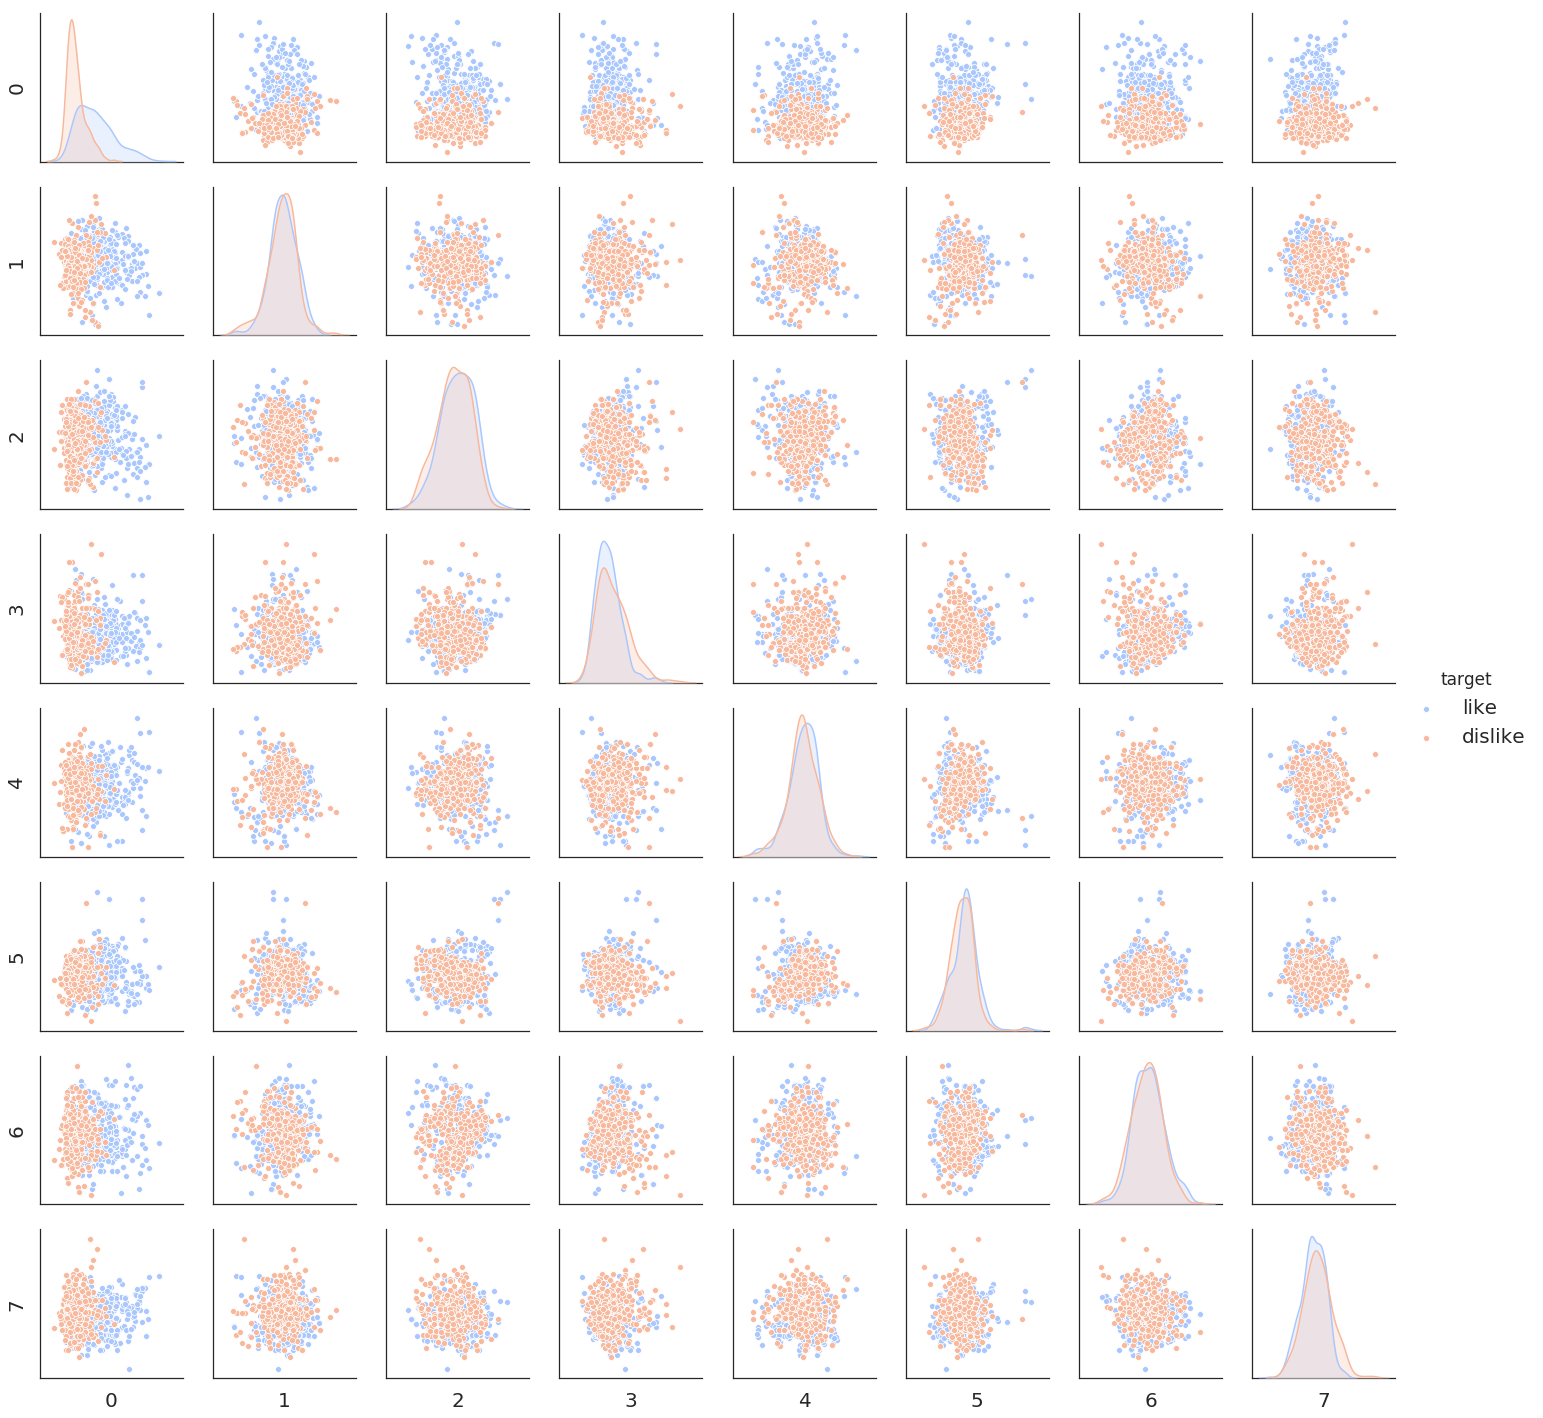

In [49]:
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20

sns_plot2=sns.pairplot(df,hue='target',palette='coolwarm')
sns_plot2.set(xticklabels=[],yticklabels=[])
sns_plot2.savefig('pca_data.pdf', dpi=300)

### Pre-processing

In [25]:
X_pca = df.drop('target',axis=1)
#y = target

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.10,random_state=123)

#one-hot
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

### NN-PCA

In [26]:
x = Input((8,))

#1
z=block(100)(x)
#2
z=block(100)(z)
#2
z=block(10)(z)

#Final
z = Dense(units=2)(z)
z = Activation(softmax)(z)

model_pca = Model(inputs=x, outputs=z)
model_pca.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

hist_pca=model_pca.fit(X_train, y_train_cat, epochs=500, batch_size=675,validation_data=[X_test,y_test_cat],shuffle=False)

Train on 675 samples, validate on 75 samples
Epoch 1/500
675/675 [==============================] - 2s 3ms/step - loss: 0.8043 - acc: 0.5585 - val_loss: 0.7169 - val_acc: 0.5467
Epoch 2/500
675/675 [==============================] - 0s 67us/step - loss: 0.7460 - acc: 0.5822 - val_loss: 0.6663 - val_acc: 0.5733
Epoch 3/500
675/675 [==============================] - 0s 93us/step - loss: 0.6969 - acc: 0.5807 - val_loss: 0.6244 - val_acc: 0.6133
Epoch 4/500
675/675 [==============================] - 0s 75us/step - loss: 0.6558 - acc: 0.6074 - val_loss: 0.5906 - val_acc: 0.6533
Epoch 5/500
675/675 [==============================] - 0s 122us/step - loss: 0.6218 - acc: 0.6341 - val_loss: 0.5637 - val_acc: 0.6667
Epoch 6/500
675/675 [==============================] - 0s 140us/step - loss: 0.5938 - acc: 0.6563 - val_loss: 0.5422 - val_acc: 0.7067
Epoch 7/500
675/675 [==============================] - 0s 132us/step - loss: 0.5709 - acc: 0.6726 - val_loss: 0.5250 - val_acc: 0.7200
Epoch 8/500
675

Epoch 62/500
675/675 [==============================] - 0s 116us/step - loss: 0.4316 - acc: 0.8119 - val_loss: 0.4497 - val_acc: 0.7733
Epoch 63/500
675/675 [==============================] - 0s 57us/step - loss: 0.4312 - acc: 0.8119 - val_loss: 0.4497 - val_acc: 0.7733
Epoch 64/500
675/675 [==============================] - 0s 91us/step - loss: 0.4308 - acc: 0.8119 - val_loss: 0.4498 - val_acc: 0.7733
Epoch 65/500
675/675 [==============================] - 0s 67us/step - loss: 0.4304 - acc: 0.8119 - val_loss: 0.4499 - val_acc: 0.7733
Epoch 66/500
675/675 [==============================] - 0s 75us/step - loss: 0.4301 - acc: 0.8119 - val_loss: 0.4499 - val_acc: 0.7733
Epoch 67/500
675/675 [==============================] - 0s 106us/step - loss: 0.4297 - acc: 0.8133 - val_loss: 0.4500 - val_acc: 0.7733
Epoch 68/500
675/675 [==============================] - 0s 110us/step - loss: 0.4294 - acc: 0.8119 - val_loss: 0.4501 - val_acc: 0.7733
Epoch 69/500
675/675 [==============================

Epoch 123/500
675/675 [==============================] - 0s 36us/step - loss: 0.4133 - acc: 0.8207 - val_loss: 0.4548 - val_acc: 0.7600
Epoch 124/500
675/675 [==============================] - 0s 82us/step - loss: 0.4131 - acc: 0.8207 - val_loss: 0.4548 - val_acc: 0.7600
Epoch 125/500
675/675 [==============================] - 0s 124us/step - loss: 0.4128 - acc: 0.8207 - val_loss: 0.4549 - val_acc: 0.7600
Epoch 126/500
675/675 [==============================] - 0s 83us/step - loss: 0.4126 - acc: 0.8207 - val_loss: 0.4549 - val_acc: 0.7600
Epoch 127/500
675/675 [==============================] - 0s 95us/step - loss: 0.4124 - acc: 0.8207 - val_loss: 0.4549 - val_acc: 0.7600
Epoch 128/500
675/675 [==============================] - 0s 64us/step - loss: 0.4121 - acc: 0.8207 - val_loss: 0.4550 - val_acc: 0.7600
Epoch 129/500
675/675 [==============================] - 0s 131us/step - loss: 0.4119 - acc: 0.8207 - val_loss: 0.4550 - val_acc: 0.7600
Epoch 130/500
675/675 [=======================

675/675 [==============================] - 0s 78us/step - loss: 0.4004 - acc: 0.8311 - val_loss: 0.4573 - val_acc: 0.7867
Epoch 184/500
675/675 [==============================] - 0s 82us/step - loss: 0.4002 - acc: 0.8311 - val_loss: 0.4573 - val_acc: 0.7867
Epoch 185/500
675/675 [==============================] - 0s 59us/step - loss: 0.4000 - acc: 0.8311 - val_loss: 0.4574 - val_acc: 0.7867
Epoch 186/500
675/675 [==============================] - 0s 77us/step - loss: 0.3998 - acc: 0.8311 - val_loss: 0.4575 - val_acc: 0.7867
Epoch 187/500
675/675 [==============================] - 0s 84us/step - loss: 0.3997 - acc: 0.8326 - val_loss: 0.4575 - val_acc: 0.7867
Epoch 188/500
675/675 [==============================] - 0s 109us/step - loss: 0.3995 - acc: 0.8326 - val_loss: 0.4575 - val_acc: 0.7867
Epoch 189/500
675/675 [==============================] - 0s 78us/step - loss: 0.3993 - acc: 0.8326 - val_loss: 0.4576 - val_acc: 0.7867
Epoch 190/500
675/675 [==============================] - 0s 7

Epoch 244/500
675/675 [==============================] - 0s 97us/step - loss: 0.3900 - acc: 0.8311 - val_loss: 0.4595 - val_acc: 0.7867
Epoch 245/500
675/675 [==============================] - 0s 54us/step - loss: 0.3899 - acc: 0.8311 - val_loss: 0.4595 - val_acc: 0.7867
Epoch 246/500
675/675 [==============================] - 0s 86us/step - loss: 0.3897 - acc: 0.8311 - val_loss: 0.4596 - val_acc: 0.7867
Epoch 247/500
675/675 [==============================] - 0s 75us/step - loss: 0.3896 - acc: 0.8311 - val_loss: 0.4596 - val_acc: 0.7867
Epoch 248/500
675/675 [==============================] - 0s 40us/step - loss: 0.3894 - acc: 0.8311 - val_loss: 0.4596 - val_acc: 0.7867
Epoch 249/500
675/675 [==============================] - 0s 87us/step - loss: 0.3893 - acc: 0.8311 - val_loss: 0.4597 - val_acc: 0.7867
Epoch 250/500
675/675 [==============================] - 0s 53us/step - loss: 0.3891 - acc: 0.8311 - val_loss: 0.4597 - val_acc: 0.7867
Epoch 251/500
675/675 [=========================

Epoch 305/500
675/675 [==============================] - 0s 131us/step - loss: 0.3810 - acc: 0.8400 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 306/500
675/675 [==============================] - 0s 111us/step - loss: 0.3808 - acc: 0.8400 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 307/500
675/675 [==============================] - 0s 101us/step - loss: 0.3807 - acc: 0.8400 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 308/500
675/675 [==============================] - 0s 29us/step - loss: 0.3805 - acc: 0.8400 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 309/500
675/675 [==============================] - 0s 116us/step - loss: 0.3804 - acc: 0.8385 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 310/500
675/675 [==============================] - 0s 118us/step - loss: 0.3803 - acc: 0.8385 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 311/500
675/675 [==============================] - 0s 92us/step - loss: 0.3801 - acc: 0.8385 - val_loss: 0.4605 - val_acc: 0.8000
Epoch 312/500
675/675 [====================

Epoch 366/500
675/675 [==============================] - 0s 88us/step - loss: 0.3726 - acc: 0.8415 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 367/500
675/675 [==============================] - 0s 93us/step - loss: 0.3725 - acc: 0.8415 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 368/500
675/675 [==============================] - 0s 73us/step - loss: 0.3724 - acc: 0.8415 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 369/500
675/675 [==============================] - 0s 93us/step - loss: 0.3723 - acc: 0.8415 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 370/500
675/675 [==============================] - 0s 105us/step - loss: 0.3721 - acc: 0.8430 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 371/500
675/675 [==============================] - 0s 102us/step - loss: 0.3720 - acc: 0.8430 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 372/500
675/675 [==============================] - 0s 114us/step - loss: 0.3719 - acc: 0.8430 - val_loss: 0.4603 - val_acc: 0.8133
Epoch 373/500
675/675 [======================

Epoch 427/500
675/675 [==============================] - 0s 73us/step - loss: 0.3645 - acc: 0.8430 - val_loss: 0.4577 - val_acc: 0.8400
Epoch 428/500
675/675 [==============================] - 0s 143us/step - loss: 0.3643 - acc: 0.8444 - val_loss: 0.4577 - val_acc: 0.8400
Epoch 429/500
675/675 [==============================] - 0s 119us/step - loss: 0.3642 - acc: 0.8444 - val_loss: 0.4576 - val_acc: 0.8400
Epoch 430/500
675/675 [==============================] - 0s 96us/step - loss: 0.3640 - acc: 0.8444 - val_loss: 0.4576 - val_acc: 0.8400
Epoch 431/500
675/675 [==============================] - 0s 170us/step - loss: 0.3639 - acc: 0.8444 - val_loss: 0.4576 - val_acc: 0.8400
Epoch 432/500
675/675 [==============================] - 0s 127us/step - loss: 0.3638 - acc: 0.8444 - val_loss: 0.4575 - val_acc: 0.8400
Epoch 433/500
675/675 [==============================] - 0s 120us/step - loss: 0.3636 - acc: 0.8444 - val_loss: 0.4575 - val_acc: 0.8400
Epoch 434/500
675/675 [====================

Epoch 488/500
675/675 [==============================] - 0s 73us/step - loss: 0.3561 - acc: 0.8459 - val_loss: 0.4551 - val_acc: 0.8400
Epoch 489/500
675/675 [==============================] - 0s 60us/step - loss: 0.3560 - acc: 0.8459 - val_loss: 0.4550 - val_acc: 0.8400
Epoch 490/500
675/675 [==============================] - 0s 60us/step - loss: 0.3558 - acc: 0.8459 - val_loss: 0.4550 - val_acc: 0.8400
Epoch 491/500
675/675 [==============================] - 0s 123us/step - loss: 0.3557 - acc: 0.8459 - val_loss: 0.4549 - val_acc: 0.8400
Epoch 492/500
675/675 [==============================] - 0s 81us/step - loss: 0.3555 - acc: 0.8459 - val_loss: 0.4549 - val_acc: 0.8400
Epoch 493/500
675/675 [==============================] - 0s 57us/step - loss: 0.3554 - acc: 0.8459 - val_loss: 0.4548 - val_acc: 0.8400
Epoch 494/500
675/675 [==============================] - 0s 46us/step - loss: 0.3553 - acc: 0.8459 - val_loss: 0.4548 - val_acc: 0.8400
Epoch 495/500
675/675 [========================

In [27]:
score_pca = model_pca.evaluate(X_test, y_test_cat) 
predict_pca = model_pca.predict(X_test)
print('loss ', score_pca[0])
print('Accuracy ', score_pca[1])

#convert one-hot to array and get the confusion matrix
arr=[]
for i in range(len(predict_pca)):
    arr.append((predict_pca[i].argmax()))
cm_dnn_pca = confusion_matrix(y_test,arr)
report_dnn_pca = classification_report(y_test,arr)
print('\nConfusion Matrix')
print(cm_dnn_pca)
print('\n')
print(report_dnn_pca)

75/75 [==============================] - 0s 299us/step
loss  0.4544512273867925
Accuracy  0.84

Confusion Matrix
[[30 10]
 [ 2 33]]


              precision    recall  f1-score   support

           0       0.94      0.75      0.83        40
           1       0.77      0.94      0.85        35

   micro avg       0.84      0.84      0.84        75
   macro avg       0.85      0.85      0.84        75
weighted avg       0.86      0.84      0.84        75



In [28]:
score_pca = model_pca.evaluate(X_pca, y_cat) 
predict_pca = model_pca.predict(X_pca)
print('loss ', score_pca[0])
print('Accuracy ', score_pca[1])

#convert one-hot to array and get the confusion matrix
arr=[]
for i in range(len(predict_pca)):
    arr.append((predict_pca[i].argmax()))
cm_dnn_pca = confusion_matrix(y,arr)
report_dnn_pca = classification_report(y,arr)
print('\nConfusion Matrix')
print(cm_dnn_pca)
print('\n')
print(report_dnn_pca)

750/750 [==============================] - 0s 166us/step
loss  0.3660830356280009
Accuracy  0.8533333330154419

Confusion Matrix
[[221  77]
 [ 33 419]]


              precision    recall  f1-score   support

           0       0.87      0.74      0.80       298
           1       0.84      0.93      0.88       452

   micro avg       0.85      0.85      0.85       750
   macro avg       0.86      0.83      0.84       750
weighted avg       0.85      0.85      0.85       750



# NN_PCA FULL

In [30]:

x = Input((8,))

#1
z=block(100)(x)
#2
z=block(100)(z)
#2
z=block(10)(z)

#Final
z = Dense(units=2)(z)
z = Activation(softmax)(z)

model_pca_full = Model(inputs=x, outputs=z)
model_pca_full.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

hist_pca_full=model_pca_full.fit(X_pca, y_cat, epochs=500, batch_size=375,shuffle=False)



score_pca_full = model_pca_full.evaluate(X_pca, y_cat) 
predict_pca_full = model_pca_full.predict(X_pca)
print('loss ', score_pca_full[0])
print('Accuracy ', score_pca_full[1])

#convert one-hot to array and get the confusion matrix
arr=[]
for i in range(len(predict_pca_full)):
    arr.append((predict_pca_full[i].argmax()))
cm_dnn_pca_full = confusion_matrix(y,arr)
report_dnn_pca_full = classification_report(y,arr)
print('\nConfusion Matrix')
print(cm_dnn_pca_full)
print('\n')
print(report_dnn_pca_full)




Epoch 1/500
750/750 [==============================] - 2s 3ms/step - loss: 1.0770 - acc: 0.5027
Epoch 2/500
750/750 [==============================] - 0s 93us/step - loss: 0.7813 - acc: 0.6013
Epoch 3/500
750/750 [==============================] - 0s 73us/step - loss: 0.6234 - acc: 0.6627
Epoch 4/500
750/750 [==============================] - 0s 112us/step - loss: 0.5499 - acc: 0.7147
Epoch 5/500
750/750 [==============================] - 0s 138us/step - loss: 0.5138 - acc: 0.7413
Epoch 6/500
750/750 [==============================] - 0s 129us/step - loss: 0.4947 - acc: 0.7573
Epoch 7/500
750/750 [==============================] - 0s 82us/step - loss: 0.4838 - acc: 0.7547
Epoch 8/500
750/750 [==============================] - 0s 78us/step - loss: 0.4768 - acc: 0.7600
Epoch 9/500
750/750 [==============================] - 0s 97us/step - loss: 0.4719 - acc: 0.7613
Epoch 10/500
750/750 [==============================] - 0s 103us/step - loss: 0.4681 - acc: 0.7627
Epoch 11/500
750/750 [====

750/750 [==============================] - 0s 74us/step - loss: 0.3594 - acc: 0.8427
Epoch 167/500
750/750 [==============================] - 0s 111us/step - loss: 0.3589 - acc: 0.8413
Epoch 168/500
750/750 [==============================] - 0s 59us/step - loss: 0.3586 - acc: 0.8413
Epoch 169/500
750/750 [==============================] - 0s 53us/step - loss: 0.3581 - acc: 0.8413
Epoch 170/500
750/750 [==============================] - 0s 50us/step - loss: 0.3579 - acc: 0.8427
Epoch 171/500
750/750 [==============================] - 0s 126us/step - loss: 0.3573 - acc: 0.8427
Epoch 172/500
750/750 [==============================] - 0s 135us/step - loss: 0.3571 - acc: 0.8413
Epoch 173/500
750/750 [==============================] - 0s 102us/step - loss: 0.3566 - acc: 0.8427
Epoch 174/500
750/750 [==============================] - 0s 123us/step - loss: 0.3564 - acc: 0.8413
Epoch 175/500
750/750 [==============================] - 0s 147us/step - loss: 0.3558 - acc: 0.8453
Epoch 176/500
750/

750/750 [==============================] - 0s 74us/step - loss: 0.3051 - acc: 0.8733
Epoch 331/500
750/750 [==============================] - 0s 72us/step - loss: 0.2984 - acc: 0.8787
Epoch 332/500
750/750 [==============================] - 0s 121us/step - loss: 0.3042 - acc: 0.8707
Epoch 333/500
750/750 [==============================] - 0s 76us/step - loss: 0.2981 - acc: 0.8773
Epoch 334/500
750/750 [==============================] - 0s 61us/step - loss: 0.3038 - acc: 0.8747
Epoch 335/500
750/750 [==============================] - 0s 80us/step - loss: 0.2967 - acc: 0.8800
Epoch 336/500
750/750 [==============================] - 0s 148us/step - loss: 0.3036 - acc: 0.8747
Epoch 337/500
750/750 [==============================] - 0s 137us/step - loss: 0.2952 - acc: 0.8800
Epoch 338/500
750/750 [==============================] - 0s 44us/step - loss: 0.3031 - acc: 0.8733
Epoch 339/500
750/750 [==============================] - 0s 128us/step - loss: 0.2944 - acc: 0.8800
Epoch 340/500
750/75

750/750 [==============================] - 0s 85us/step - loss: 0.2713 - acc: 0.8707
Epoch 495/500
750/750 [==============================] - 0s 88us/step - loss: 0.2568 - acc: 0.8853
Epoch 496/500
750/750 [==============================] - 0s 78us/step - loss: 0.2807 - acc: 0.8827
Epoch 497/500
750/750 [==============================] - 0s 83us/step - loss: 0.2875 - acc: 0.8813
Epoch 498/500
750/750 [==============================] - 0s 64us/step - loss: 0.2846 - acc: 0.8853
Epoch 499/500
750/750 [==============================] - 0s 79us/step - loss: 0.2683 - acc: 0.8840
Epoch 500/500
750/750 [==============================] - 1s 753us/step
loss  0.2551969548066457
Accuracy  0.9

Confusion Matrix
[[253  45]
 [ 30 422]]


              precision    recall  f1-score   support

           0       0.89      0.85      0.87       298
           1       0.90      0.93      0.92       452

   micro avg       0.90      0.90      0.90       750
   macro avg       0.90      0.89      0.89      

### KNN_PCA

In [34]:
error=[]
for j in range(1,200):
    knn_pca = KNeighborsClassifier(n_neighbors=j)
    knn_pca.fit(X_train,y_train)

    predict_knn_pca = knn_pca.predict(X_test)
    cm_knn_pca = confusion_matrix(y_test,predict_knn_pca)
    report_knn_pca = classification_report(y_test,predict_knn_pca)
    error.append(knn_pca.score(X_test,y_test))
    
error=np.array(error)
best=error.argmax()+1

knn_pca = KNeighborsClassifier(n_neighbors=best)
knn_pca.fit(X_pca,y)

predict_knn_pca = knn_pca.predict(X_pca)
cm_knn_pca = confusion_matrix(y,predict_knn_pca)
report_knn_pca = classification_report(y,predict_knn_pca)

print('Best k',best)
print('\nConfusion Matrix')
print(cm_knn_pca)
print('\n')
print(report_knn_pca)

Best k 14

Confusion Matrix
[[222  76]
 [ 49 403]]


              precision    recall  f1-score   support

           0       0.82      0.74      0.78       298
           1       0.84      0.89      0.87       452

   micro avg       0.83      0.83      0.83       750
   macro avg       0.83      0.82      0.82       750
weighted avg       0.83      0.83      0.83       750



In [46]:
predict_knn_pca = knn_pca.predict(X_test)
cm_knn_pca = confusion_matrix(y_test,predict_knn_pca)
report_knn_pca = classification_report(y_test,predict_knn_pca)

print('Best k',best)
print('\nConfusion Matrix')
print(cm_knn_pca)
print('\n')
print(report_knn_pca)

Best k 14

Confusion Matrix
[[30 10]
 [ 3 32]]


              precision    recall  f1-score   support

           0       0.91      0.75      0.82        40
           1       0.76      0.91      0.83        35

   micro avg       0.83      0.83      0.83        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.84      0.83      0.83        75



# Real data #2  - PCA

In [37]:
songs_feat_data.head()

acousticness  danceability  duration    energy  instrumentalness       key  \
0     -0.306545      0.980390 -0.977148  1.110579         -0.335307  0.311190   
1      0.055237      1.199914  0.688626 -0.744827         -0.335251 -0.795262   
2     -0.819705      0.922620  0.114906  1.039698         -0.335307  0.864416   
3      1.838761     -1.873427 -0.216265 -1.962306         -0.335307  0.587803   
4     -0.983142      1.887372 -0.972102  0.147436         -0.335307 -0.795262   

   liveness  loudness      mode  speechiness     tempo  time_signature  \
0  1.297563  0.573396 -1.491914    -0.287025 -0.346556        0.167284   
1  0.787320  0.232848  0.670280     0.340208 -1.244015        0.167284   
2  0.559862  0.719789  0.670280     0.237862  0.354626        0.167284   
3  0.504535 -1.078251  0.670280    -0.493178  1.817877       -2.222490   
4 -0.632753  0.876179  0.670280    -0.075754 -0.669524        0.167284   

    valence  
0  0.139226  
1 -1.112223  
2  0.593919  
3 -1.112223  
4 -0.895305

In [38]:
pca_r = PCA(n_components=8)
pca_r.fit(songs_feat)
songs_pca = pca_r.transform(songs_feat)
songs_pca.shape

(200, 8)

In [39]:
songs_pca_data=pd.DataFrame(songs_pca)
songs_pca_data.head()

0         1         2         3         4         5         6  \
0 -1.541419  0.164927 -0.009845  0.782388 -1.232415  0.625099  0.740372   
1  0.112038  1.497471  1.381387 -0.216002  0.406922 -1.006046 -0.241161   
2 -1.914808 -0.073250 -0.013154 -0.566599  0.464000  0.479750  0.463610   
3  3.604824 -0.365481 -1.109378 -0.579370  1.253433  2.016491 -0.832241   
4 -1.271365 -0.522048  0.961681  0.140957  0.191864 -1.786093 -0.519813   

          7  
0  0.624594  
1  0.005443  
2 -0.255484  
3  1.132931  
4  0.554581

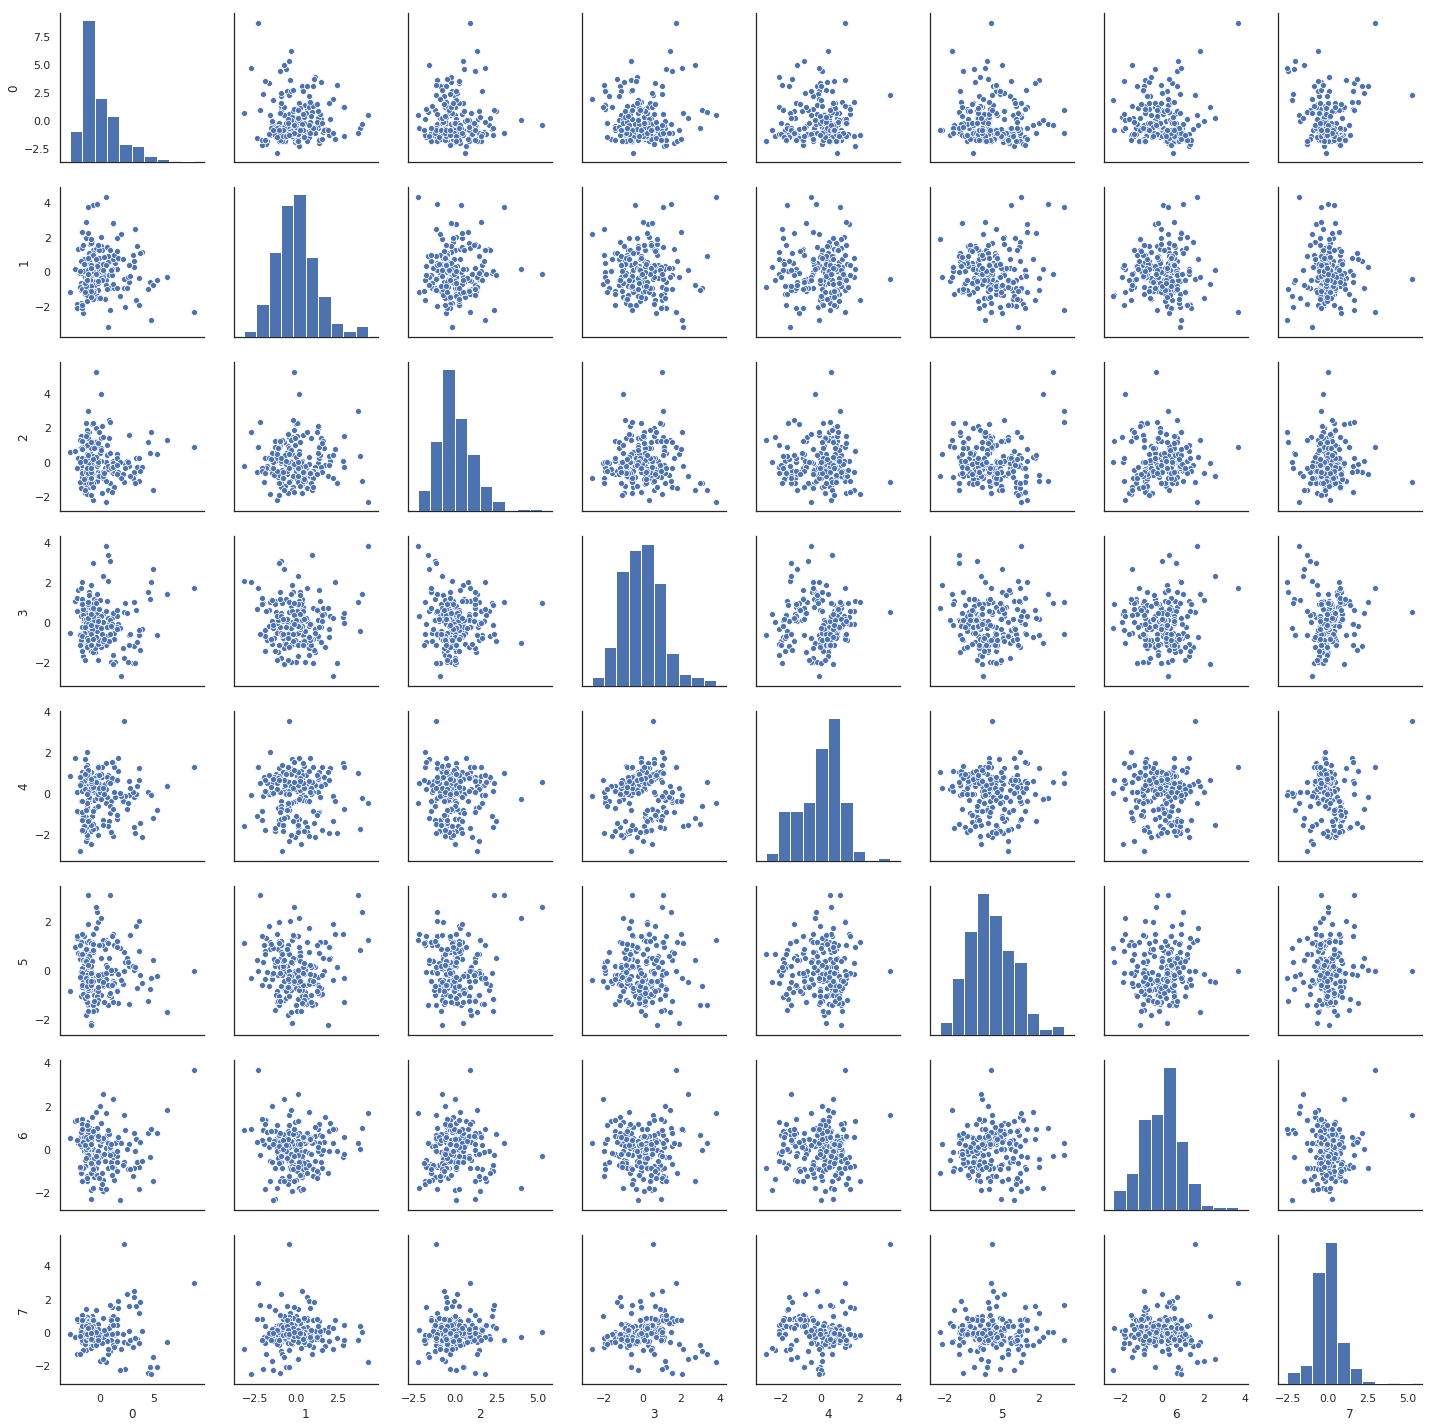

In [40]:
sns.pairplot(songs_pca_data,palette='coolwarm')

In [128]:
#predictions from pca
final_predict_dnn_pca = model_pca.predict(songs_pca_data)
final_predict_knn_pca = knn_pca.predict(songs_pca_data)

In [41]:
#nn+pca+full
final_predict_dnn_pca_full = model_pca_full.predict(songs_pca_data)  

In [44]:
#convert one-hot to array and get results
arr=[]
for i in range(len(final_predict_dnn_pca_full)):
    arr.append(str(final_predict_dnn_pca_full[i].argmax()))
print('PCA_DNN_FULL\n')
print(''.join(arr))

PCA_DNN_FULL

01010111011001101010001101000000111111011111100111001001011011100101111111010110110011000000111011110010111111010010100001100101111011111101100111001010101111100101101100001001001111001110100110111111


# STOP!!!!! DATA TO SUBMIT

In [129]:
#convert one-hot to array and get results
arr2=[]
for i in range(len(final_predict_dnn_pca)):
    arr2.append(str(final_predict_dnn_pca[i].argmax()))
print('PCA_DNN\n')
print(''.join(arr2))

PCA_DNN

01010111010001111010101100010000101011010111100111101001101011100111110011000110110111100000111011110010001101010010110001100101111011111100100111001010111111100101100100001011001110001110101110010011


In [130]:
arr=[]
for i in range(len(final_predict_knn_pca)):
    arr.append(str(final_predict_knn_pca[i]))
print('PCA_KNN\n')
print(''.join(arr))

PCA_KNN

01110111010101101010001001010010101111011111100111101001111011101111111011010110110111000000111011111010011111110010111001101110101011110111100111000010101111110101101110001011111101101111101111111111
